In [9]:
import pandas as pd
import numpy as np

# Charger les données
data = pd.read_csv('gaze-data-recording-1711718601786.json')

print(data)

Empty DataFrame
Columns: [{"trackerWindowSize":{"width":1440, height:813}, gameCanvasSize:{"width":1440, height:810}, dataLen:1150, camSpec:{"width":"640", height:"480"}, browserSpec:{"name":"Chrome", version:"123.0.0.0"}, data:[{"x":1385, y:732, timestamp:1711718475909}, {"x":1311, y:751, timestamp:1711718476091}, {"x":1249, y:761, timestamp:1711718476140}, {"x":1126, y:783, timestamp:1711718476224}, {"x":1027, y:801, timestamp:1711718476278}, {"x":941, y:811, timestamp:1711718476346}, {"x":879, y:811.1, timestamp:1711718476398}, {"x":822, y:811.2, timestamp:1711718476505}, {"x":786, y:811.3, timestamp:1711718476558}, {"x":826, y:811.4, timestamp:1711718476661}, {"x":859, y:811.5, timestamp:1711718476761}, {"x":953, y:811.6, timestamp:1711718476805}, {"x":1014, y:805, timestamp:1711718476866}, {"x":1065, y:800, timestamp:1711718476932}, {"x":1062, y:726, timestamp:1711718477025}, {"x":1056, y:649, timestamp:1711718477087}, {"x":1022, y:520, timestamp:1711718477188}, {"x":976, y:397, t

In [10]:
import pandas as pd
import json

# Charger les données
data = pd.read_csv('gaze-data-recording-1711718601786.json')

# Extraire les données JSON de la colonne 'Columns' et les convertir en dictionnaires
data['data'] = data['Columns'].apply(lambda x: json.loads(x)['data'])

# Concaténer les listes de dictionnaires dans une seule liste
all_data = [point for sublist in data['data'] for point in sublist]

# Trier les données en fonction de la clé 'timestamp'
sorted_data = sorted(all_data, key=lambda x: x['timestamp'])

# Afficher les données triées
print(sorted_data)


KeyError: 'Columns'

In [13]:
import pandas as pd
import json

data = pd.read_csv('gaze-data-recording-1711718601786.json')

data['trackerWindowSize'] = data['trackerWindowSize'].apply(json.loads)
data['calibPoints'] = data['calibPoints'].apply(json.loads)

print("Données:")
print(data['trackerWindowSize'])
print("\nPoints de calibrage:")
print(data['calibPoints'])


KeyError: 'trackerWindowSize'

In [14]:
import json

with open('gaze-data-recording-1711718601786.json', 'r') as file:
    data = json.load(file)

calibration_points = data["calibPoints"]
gaze_tracking_data = data["data"]

print("Points de calibration:")
print(calibration_points)
print("\nQuelques données de suivi du regard:")
for point in gaze_tracking_data[:5]:
    print(point)


Points de calibration:
{'pt1': {'x': 33.8, 'y': 799.74}, 'pt2': {'x': 1401.8, 'y': 799.74}, 'pt3': {'x': 33.8, 'y': 35.51999999999998}, 'pt4': {'x': 1401.8, 'y': 35.51999999999998}, 'pt5': {'x': 725, 'y': 409.5}, 'pt6': {'x': 725, 'y': 746}, 'pt7': {'x': 1401.8, 'y': 409.5}, 'pt8': {'x': 725, 'y': 35.51999999999998}, 'pt9': {'x': 33.8, 'y': 409.5}}

Quelques données de suivi du regard:
{'x': 1385, 'y': 732, 'timestamp': 1711718475909}
{'x': 1311, 'y': 751, 'timestamp': 1711718476091}
{'x': 1249, 'y': 761, 'timestamp': 1711718476140}
{'x': 1126, 'y': 783, 'timestamp': 1711718476224}
{'x': 1027, 'y': 801, 'timestamp': 1711718476278}


In [15]:
import json
import math
import numpy as np

with open('gaze-data-recording-1711718601786.json', 'r') as file:
    data = json.load(file)

def distance(point1, point2):
    return math.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

reference_point = {"x": 725, "y": 409.5}

distances = []

for point in data["data"]:
    if distance(point, reference_point) <= rayon_du_cercle:
        distances.append(distance(point, reference_point))

min_distance = np.min(distances)
max_distance = np.max(distances)
median_distance = np.median(distances)

# Afficher les résultats
print("Distance minimale au cercle:", min_distance)
print("Distance maximale au cercle:", max_distance)
print("Distance médiane au cercle:", median_distance)


NameError: name 'rayon_du_cercle' is not defined

In [16]:
import json
import math
import numpy as np

with open('gaze-data-recording-1711718601786.json', 'r') as file:
    data = json.load(file)

def distance(point1, point2):
    return math.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

reference_point = {"x": 725, "y": 409.5}

rayon_du_cercle = 1

distances = []

for point in data["data"]:
    if distance(point, reference_point) <= rayon_du_cercle:
        distances.append(distance(point, reference_point))

min_distance = np.min(distances)
max_distance = np.max(distances)
median_distance = np.median(distances)

print("Distance minimale au cercle:", min_distance)
print("Distance maximale au cercle:", max_distance)
print("Distance médiane au cercle:", median_distance)


ValueError: zero-size array to reduction operation minimum which has no identity

In [17]:
import json
import math
import numpy as np

# Charger les données depuis le fichier JSON
with open('gaze-data-recording-1711718601786.json', 'r') as file:
    data = json.load(file)

# Définir une fonction pour calculer la distance entre deux points
def distance(point1, point2):
    return math.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

# Définir le point de référence (centre du cercle)
reference_point = {"x": 725, "y": 409.5}

# Définir le rayon du cercle autour du point de référence
rayon_du_cercle = 50  # Par exemple, vous pouvez ajuster cette valeur selon vos besoins

# Initialiser une liste pour stocker les distances des points à l'intérieur du cercle
distances = []

# Calculer les distances pour chaque point
for point in data["data"]:
    if distance(point, reference_point) <= rayon_du_cercle:
        distances.append(distance(point, reference_point))

# Vérifier si des distances ont été collectées
if distances:
    # Calculer les statistiques sur les distances
    min_distance = np.min(distances)
    max_distance = np.max(distances)
    median_distance = np.median(distances)

    # Afficher les résultats
    print("Distance minimale au cercle:", min_distance)
    print("Distance maximale au cercle:", max_distance)
    print("Distance médiane au cercle:", median_distance)
else:
    print("Aucun point à l'intérieur du cercle.")


Distance minimale au cercle: 13.647344063956181
Distance maximale au cercle: 49.20619879649311
Distance médiane au cercle: 33.14029066281485


IndexError: list index out of range

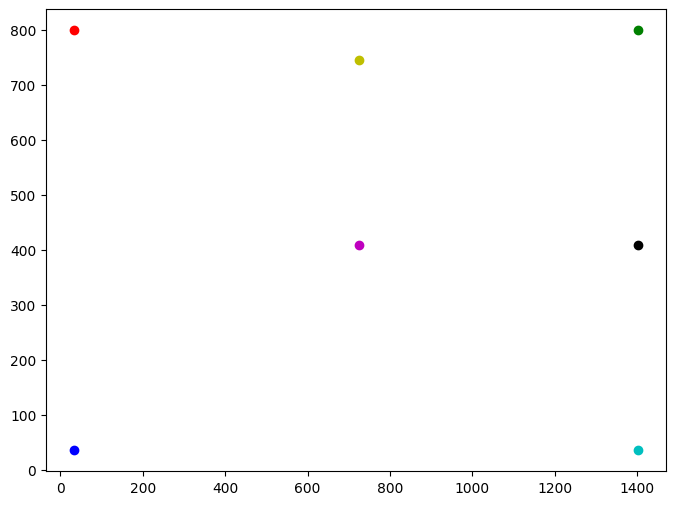

In [18]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt

# Charger les données depuis le fichier JSON
with open('gaze-data-recording-1711718601786.json', 'r') as file:
    data = json.load(file)

# Définir une fonction pour calculer la distance entre deux points
def distance(point1, point2):
    return math.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

# Extraire les points de calibration
calibration_points = data["calibPoints"]

# Extraire les données de suivi du regard
gaze_tracking_data = data["data"]

# Définir les couleurs pour les points de calibration
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Créer le graphique
plt.figure(figsize=(8, 6))

# Tracer les points de calibration
for i, (key, point) in enumerate(calibration_points.items()):
    plt.scatter(point['x'], point['y'], color=colors[i], label=key)

# Tracer les points de suivi du regard
for point in gaze_tracking_data:
    closest_calibration_point = None
    min_distance = float('inf')
    for key, calibration_point in calibration_points.items():
        dist = distance(point, calibration_point)
        if dist < min_distance:
            min_distance = dist
            closest_calibration_point = key
    plt.scatter(point['x'], point['y'], color=colors[list(calibration_points.keys()).index(closest_calibration_point)], alpha=0.5)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points de calibration et suivi du regard')
plt.show()


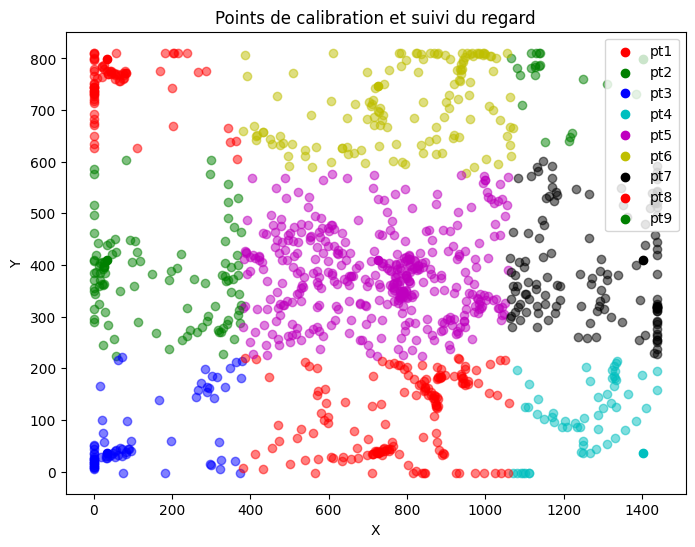

In [23]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt

with open('gaze-data-recording-1711718601786.json', 'r') as file:
    data = json.load(file)

def distance(point1, point2):
    return math.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

calibration_points = data["calibPoints"]
gaze_tracking_data = data["data"]

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.figure(figsize=(8, 6))

for i, (key, point) in enumerate(calibration_points.items()):
    plt.scatter(point['x'], point['y'], color=colors[i % len(colors)], label=key)

for point in gaze_tracking_data:
    closest_calibration_point = None
    min_distance = float('inf')
    for key, calibration_point in calibration_points.items():
        dist = distance(point, calibration_point)
        if dist < min_distance:
            min_distance = dist
            closest_calibration_point = key
    plt.scatter(point['x'], point['y'], color=colors[list(calibration_points.keys()).index(closest_calibration_point) % len(colors)], alpha=0.5)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points de calibration et suivi du regard')
plt.show()

In [6]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt

with open('gaze-data-recording-1711718601786.json', 'r') as file:
    data = json.load(file)

def distance(point1, point2):
    return math.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

calibration_points = data["calibPoints"]

gaze_tracking_data = data["data"]

marker_shapes = ['o', 's', '^', 'x', 'D', '*', '+', 'P', 'h']

plt.figure(figsize=(8, 6))

for i, (key, point) in enumerate(calibration_points.items()):
    plt.scatter(point['x'], point['y'], color='black', marker=marker_shapes[i], label=key)

for point in gaze_tracking_data:
    closest_calibration_point = None
    min_distance = float('inf')
    for key, calibration_point in calibration_points.items():
        dist = distance(point, calibration_point)
        if dist < min_distance:
            min_distance = dist
            closest_calibration_point = key
    plt.scatter(point['x'], point['y'], color='red', marker='o' if closest_calibration_point is None else marker_shapes[list(calibration_points.keys()).index(closest_calibration_point)], alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points de calibration et suivi du regard')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'gaze-data-recording-1711718601786.json'

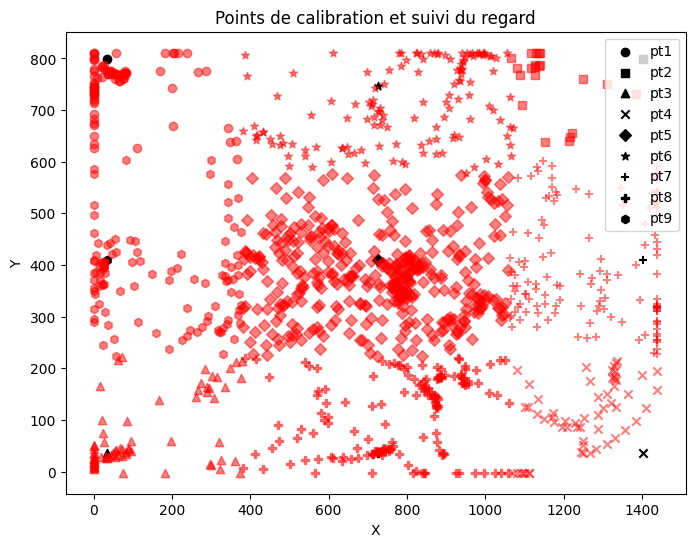

In [13]:
import os
import json
import math
import numpy as np
import matplotlib.pyplot as plt

def distance(point1, point2):
    return math.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

def calculate_calibration_average(folder_path):
    all_calibration_points = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                calibration_points = data.get("calibPoints")
                if calibration_points:
                    all_calibration_points.extend(calibration_points.values())
    
    return avg_calibration_x, avg_calibration_y

def plot_calibration(calibration_points, gaze_tracking_data):
    marker_shapes = ['o', 's', '^', 'x', 'D', '*', '+', 'P', 'h']

    plt.figure(figsize=(8, 6))

    for i, (key, point) in enumerate(calibration_points.items()):
        plt.scatter(point['x'], point['y'], color='black', marker=marker_shapes[i], label=key)

    for point in gaze_tracking_data:
        closest_calibration_point = None
        min_distance = float('inf')
        for key, calibration_point in calibration_points.items():
            dist = distance(point, calibration_point)
            if dist < min_distance:
                min_distance = dist
                closest_calibration_point = key
        plt.scatter(point['x'], point['y'], color='red', marker='o' if closest_calibration_point is None else marker_shapes[list(calibration_points.keys()).index(closest_calibration_point)], alpha=0.5)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points de calibration et suivi du regard')
    plt.legend()
    plt.show()

folder_path = './data_file'

with open(os.path.join(folder_path, os.listdir(folder_path)[0]), 'r') as file:
    data = json.load(file)

calibration_points = data["calibPoints"]
gaze_tracking_data = data["data"]

plot_calibration(calibration_points, gaze_tracking_data)